In [36]:
import numpy as np
from keras import layers, models, regularizers
from keras.datasets import reuters

In [2]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])
for _ in train_data[0]:
  print(word_index.get(_ - 3))

550378/550378 [==============================] - 0s 0us/step
None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [4]:
train_labels[0]

3

In [5]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

In [6]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [7]:
from keras.utils import to_categorical

In [8]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [9]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [55]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [56]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics= ['accuracy'])

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [57]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size= 512,
          validation_data=(x_val,y_val))

Epoch 1/9
16/16 [==============================] - 1s 36ms/step - loss: 2.7337 - accuracy: 0.4728 - val_loss: 1.8038 - val_accuracy: 0.6090
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.5203 - accuracy: 0.6765 - val_loss: 1.3784 - val_accuracy: 0.6790
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1671 - accuracy: 0.7467 - val_loss: 1.1792 - val_accuracy: 0.7320
Epoch 4/9
16/16 [==============================] - 0s 20ms/step - loss: 0.9560 - accuracy: 0.7888 - val_loss: 1.0725 - val_accuracy: 0.7570
Epoch 5/9
16/16 [==============================] - 0s 20ms/step - loss: 0.7880 - accuracy: 0.8300 - val_loss: 0.9882 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 0s 21ms/step - loss: 0.6562 - accuracy: 0.8572 - val_loss: 0.9687 - val_accuracy: 0.7770
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5479 - accuracy: 0.8817 - val_loss: 0.9332 - val_accuracy: 0.7990
Epoch 8/9
16/16 [===

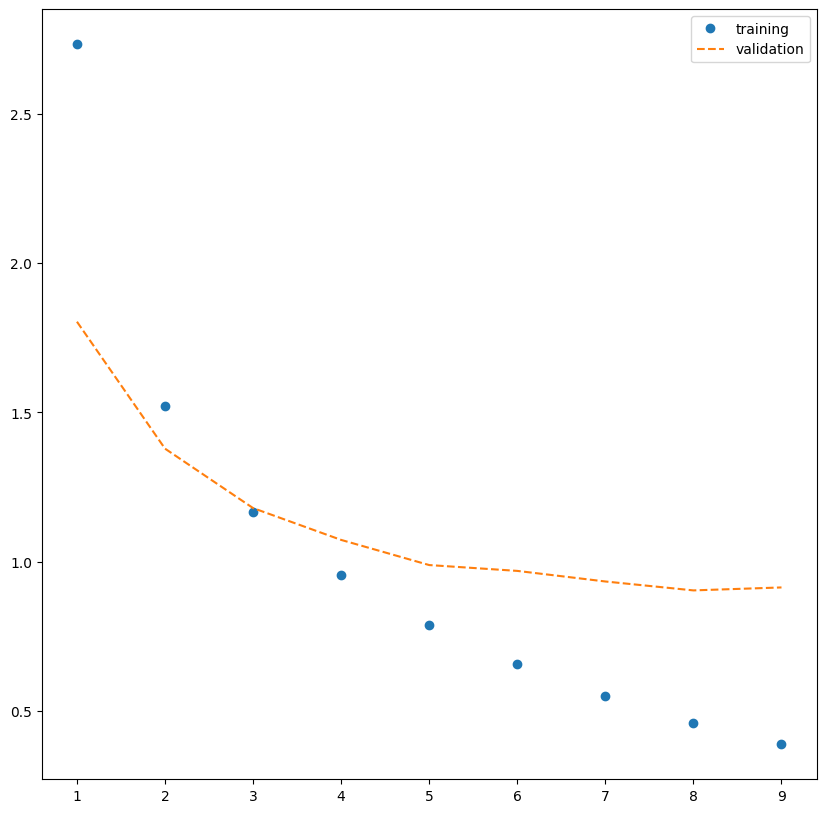

In [58]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

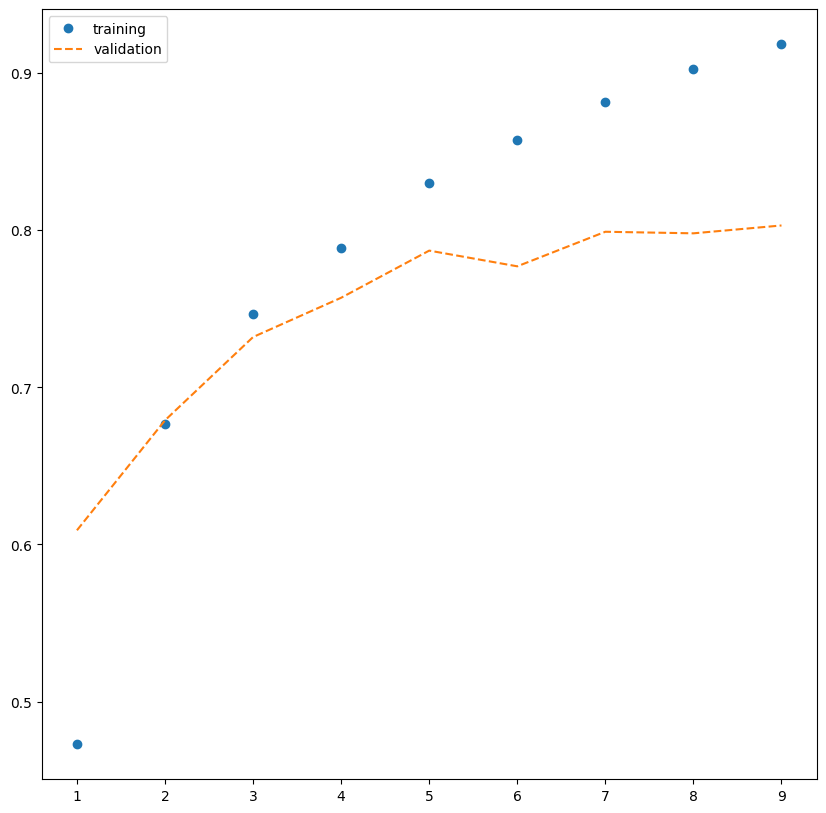

In [59]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [60]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9722 - accuracy: 0.7774


[0.9722279906272888, 0.7773820161819458]

In [30]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [31]:
predictions[0]

array([3.50087284e-05, 2.22360453e-04, 1.78444898e-05, 4.29810405e-01,
       5.56031704e-01, 9.50767790e-05, 4.67076257e-04, 1.47060753e-04,
       3.36812134e-03, 1.45710655e-04, 3.08236253e-04, 1.80811319e-03,
       9.75749572e-05, 5.02561044e-04, 3.31717820e-05, 3.41134219e-05,
       1.16464903e-03, 4.39003139e-04, 8.33048980e-05, 2.81973276e-04,
       1.37458672e-03, 1.65087229e-04, 7.13194777e-06, 5.22636874e-05,
       1.40806869e-05, 5.03824340e-05, 3.50598493e-05, 1.66091995e-05,
       7.91873608e-05, 9.41491235e-05, 1.35500799e-04, 1.09484885e-04,
       7.69969847e-05, 2.40464433e-05, 4.08380962e-04, 7.87137287e-06,
       1.22721260e-03, 1.44417427e-04, 1.66044956e-05, 3.00096872e-04,
       2.32425500e-05, 3.78471042e-04, 4.63910619e-05, 7.63854841e-05,
       3.29591785e-05, 1.03662805e-05], dtype=float32)

In [32]:
np.sum(predictions[0])

1.0

In [34]:
np.argmax(predictions[0])

4

# Intento no.2 con L2 y Dropout

In [65]:
model2 = models.Sequential()
model2.add(layers.Dense(128, activation='relu', input_shape = (10000,),
                        kernel_regularizer= regularizers.l2(0.001)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(128, activation='relu',kernel_regularizer= regularizers.l2(0.001)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics= ['accuracy'])

history2 = model2.fit(partial_x_train, partial_y_train,
          epochs=30,
          batch_size= 512,
          validation_data=(x_val,y_val))

Epoch 1/30
16/16 [==============================] - 1s 33ms/step - loss: 2.9363 - accuracy: 0.4728 - val_loss: 1.9531 - val_accuracy: 0.6230
Epoch 2/30
16/16 [==============================] - 0s 19ms/step - loss: 1.8089 - accuracy: 0.6710 - val_loss: 1.5772 - val_accuracy: 0.7210
Epoch 3/30
16/16 [==============================] - 0s 17ms/step - loss: 1.5090 - accuracy: 0.7290 - val_loss: 1.4295 - val_accuracy: 0.7470
Epoch 4/30
16/16 [==============================] - 0s 23ms/step - loss: 1.3083 - accuracy: 0.7729 - val_loss: 1.3343 - val_accuracy: 0.7710
Epoch 5/30
16/16 [==============================] - 0s 21ms/step - loss: 1.1657 - accuracy: 0.7977 - val_loss: 1.2781 - val_accuracy: 0.7820
Epoch 6/30
16/16 [==============================] - 0s 21ms/step - loss: 1.0483 - accuracy: 0.8262 - val_loss: 1.2241 - val_accuracy: 0.8060
Epoch 7/30
16/16 [==============================] - 0s 24ms/step - loss: 0.9712 - accuracy: 0.8452 - val_loss: 1.1959 - val_accuracy: 0.8110
Epoch 8/30
16

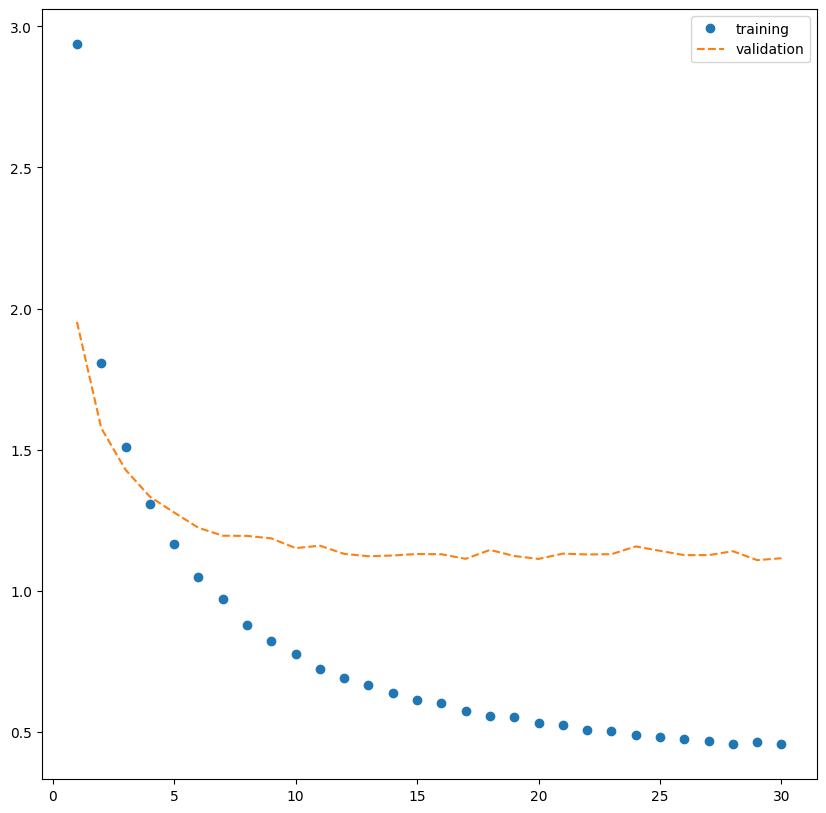

In [66]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values2)+1)
plt.plot(epoch, loss_values2, 'o', label = 'training')
plt.plot(epoch, val_loss_values2, '--', label = 'validation')
plt.legend()
plt.show()

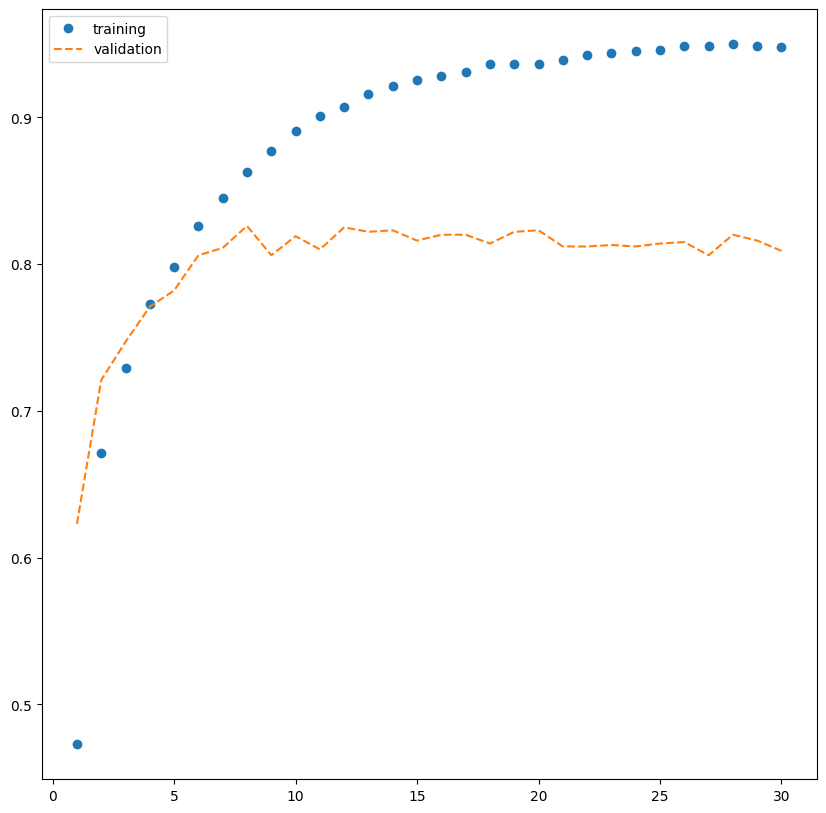

In [67]:
history_dict2 = history2.history
accuracy_values2 = history_dict2['accuracy']
val_accuracy_values2 = history_dict2['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(accuracy_values2)+1)
plt.plot(epoch, accuracy_values2, 'o', label = 'training')
plt.plot(epoch, val_accuracy_values2, '--', label = 'validation')
plt.legend()
plt.show()

In [69]:
model2.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.2064 - accuracy: 0.7965


[1.206404447555542, 0.7965271472930908]